# Preamble

Many of the ideas, text, and code are mine.  However, I have used ChatGPT to also generate ideas, code, and text.  ChatGPT often provides insights that I didn't think of or different ways of explaining things.  Overall, my goal is not to write a tutorial using only my own ideas, thoughts, and code, but rather to write something that is useful for understanding how deep learning at an intuitive level.  There will be terms which are thrown out which probably won't make much sense in the beginning.  I hope to explain them in time.

In [ ]:
!pip install torchviz matplotlib graphviz


# Introduction

The goal of this section is to introduce 
- neural networks and deep neural networks
- models and how they differ from functions
- making preditions through inference
- training models
- loss
- gradient descent
- learning rate
- epochs
- overfitting

# A Brief Overview of Neural Networks and AI

Neural networks (NN) are computational **models** inspired by the human brain, designed to recognize patterns. They consist of interconnected **layers** of nodes, or "**neurons**," that process and transmit information. Typically organized into **input**, **hidden**, and **output layers**, neural networks are **trained** on data to perform **tasks** like **classification**, **regression**, and **pattern recognition**. The training process involves adjusting the **weights** of connections based on the difference between the **predicted** and **actual output**, often using algorithms like **backpropagation**.

A Deep Neural Network (DNN) is a type of neural network with multiple layers between the input and output layers. These additional layers enable the network to learn more complex features and representations, making DNNs well-suited for tasks like image and speech recognition, natural language processing, and more. The "deep" in DNN refers to the depth, or number of layers, in the network.

Neural networks with at least one hidden layer are theoretically capable of approximating any **continuous function** to a high degree of **accuracy**, given enough neurons and appropriate training. This is known as the Universal Approximation Theorem. However, the practical ability to approximate any function depends on factors like **architecture**, **training data**, and **optimization algorithms**.

Outside of neural networks, various other types of machine learning models exist, including:

* Decision Trees: Used for classification and regression tasks.
* Random Forest: **Ensemble** of decision trees that improves prediction accuracy.
* Support Vector Machines (SVM): Effective for classification and some regression tasks.
* Linear Regression: Used for predicting numerical values based on **linear relationships**.
* Logistic Regression: Used for **binary classification** tasks.
* K-Nearest Neighbors (K-NN): Classification or regression based on the closest data points.
* Naive Bayes: Probabilistic classifier based on Bayes' theorem.
* Gradient Boosting Machines: Ensemble method that combines multiple **weak learners**.
* Hidden Markov Models: Used in **time series analysis** and **natural language processing (NLP)**.

Each has its own strengths, weaknesses, and suitability for specific types of data and tasks.

All of these machine learning models can act as functions for **prediction**. They take an input (or set of inputs) and produce an output based on the learned patterns in the data. The type of prediction—whether it's classification, regression, or clustering—depends on the specific model and how it's trained.

They all take the form of f(x) => y where x is some input data.

All of the above models or functions are **supervised**.  All this means is that to make the model work properly, they must be trained using input/expected output pairs.  For example, to train a model to add, it would need a bunch of input equations such as 1+1 and the corresponding expected output of 2.

Some machine learning approaches are **unsupervised**.  These are generally **clustering** algorithms or algorithms which alter the **dimensionality of data**.

* Hidden Markov Models: Used in time series analysis and natural language processing.
* Clustering Algorithms (e.g., K-Means, Hierarchical): Used for unsupervised learning to group data.
* Principal Component Analysis (PCA): Dimensionality reduction technique.
* Gaussian Mixture Models: Probabilistic model for clustering.

Note that Hidden Markov Models can be both supervised or unsupervised.

This document will largely focus on neural networks (NN).  I find myself frequently using neural networks and deep neural networks interchangeably.  In general, most useful neural networks that are used today are in fact DNNs.  DNNs and NNs operate in the same manner.  There are just more operations in a DNN as it has more layers.

# A Simple Function

In [3]:
def add(a, b):
    return a + b

print('3 + 5 =', add(3, 5))

3 + 5 = 8


# Common Python Imports

The following imports are used very frequent when working with PyTorch

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seed for reproducibility
def set_random_seed(SEED):
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    np.random.seed(SEED)
    random.seed(SEED)

set_random_seed(42)

# Models

All of the **supervised** **models** above take **input**.  Input is like the a and b to the add function above.  They also produce an output.  In the function above, if 3 and 5 are passed as input, the function will return 8 as output.  A model's output is often called **output**, or a **prediction**. 

The function `add(a, b)` is deterministic and straightforward; it simply returns the sum of `a` and `b`. For this specific task of addition, it would always be correct, assuming that `a` and `b` are numbers or other types that support the addition operation. It's a simple, well-defined function with predictable behavior.

Imagine if the add function above didn't include the logic `return a + b` and instead we asked the computer to figure out how to convert a and b to the proper output.

If the add function lacked the logic `return a + b`, and you wanted the computer to "learn" how to perform addition, you'd essentially be asking for a machine learning model to approximate the addition function. Through `supervised learning`, you could train the model on numerous examples of addition problems (input pairs a, b) and their corresponding sums (outputs). Once trained, the model could then "infer" or predict the sum for any new pair of numbers a and b, effectively approximating the addition function.

# Models look like functions but they are not quite the same

**A model is a collection of layers and operations organized in a specific architecture, often used to map inputs to outputs**. It may include **learnable parameters**, and is usually designed for **tasks like classification, regression, etc**.

A function is a block of reusable code that performs a specific operation. It doesn't have learnable parameters and does the same operation each time it's called.

In machine learning, a model can be considered a complex function with learnable parameters.

A model is **trained** to perform a **task**.  Once the model is sufficiently **accurate**, it can then be used like a function to produce results.  A function typically will always produce the right and consistent answer if it is programmed to do so through a series of well designed steps.  A model on the other hand relies on being trained through lots of data and less on those steps.  For example, the same model might be trained to do different things.

It is often the case that a model might be 99% accurate.  All this means is that in 99 out of a 100 cases, it will produce the right answer AND in 1 out of every 100 cases, it will produce the wrong answer.  Models usually require more computational resources to arrive at the answer than functions.  Functions in general should be used when there is a way to programatically compute the answer in a reliable manner.  Models should be used when writing such functions would be arbitrarily complex.

It doesn't make sense to write a neural network to solve an addition problem.  However, it can help to illustrate the differences and important concepts related to machine learning.

The first concept introduced here is a model which supports adding two numbers together and finally outputting the sum of those two numbers.  

# The First Model

The model below likely won't make a lot of sense at first.  It consists of layers of neurons (which are just floating point numbers) which will be organized to provide the final answer.

The input layer maps the two inputs (a + b) into the `network` of numbers.  This input mapping layer is the first layer.  The next layer consists of 4 weights (the output parameter


In [8]:
# Define the neural network model
class Adder(torch.nn.Module):
    def __init__(self):
        super(Adder, self).__init__()
        self.input = torch.nn.Linear(2, 4)
        self.hidden = torch.nn.Linear(4, 4)
        self.output = torch.nn.Linear(4, 1)
    
    def forward(self, x):
        x = self.input(x)
        x = self.hidden(x)
        return self.output(x)


# Calling this to make the work repeatable
set_random_seed(42)
model = Adder()
print(model)

Adder(
  (input): Linear(in_features=2, out_features=4, bias=True)
  (hidden): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
)


# Visualizing Neural Networks

The following code is very useful for visualizing deep neural networks.  At the end, the draw_dnn function is called to visualize the Adder model above.

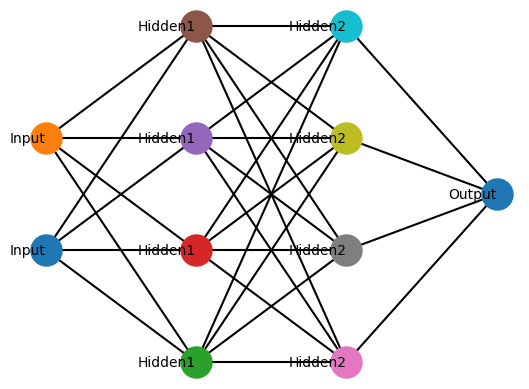

In [9]:
def draw_dnn(layers):
    fig, ax = plt.subplots()
    for i, n_neurons in enumerate(layers):
        y_offset = -n_neurons / 2.0 + 0.5
        for j in range(n_neurons):
            plt.scatter(i, j + y_offset, s=500, zorder=2)
            if i == 0:
                plt.text(i, j + y_offset, 'Input', verticalalignment='center', horizontalalignment='right')
            elif i == len(layers) - 1:
                plt.text(i, j + y_offset, 'Output', verticalalignment='center', horizontalalignment='right')
            else:
                plt.text(i, j + y_offset, f'Hidden{i}', verticalalignment='center', horizontalalignment='right')
    
    for i in range(len(layers) - 1):
        y_offset_src = -layers[i] / 2.0 + 0.5
        y_offset_dst = -layers[i+1] / 2.0 + 0.5
        for j in range(layers[i]):
            for k in range(layers[i+1]):
                plt.plot([i, i+1], [j + y_offset_src, k + y_offset_dst], c='black', zorder=1)
    
    plt.axis('off')
    plt.show()

draw_dnn([2, 4, 4, 1])

# Testing the model

We can now test our new Adder model.  If all is well, then it should be able to answer with 100 (30 + 70)

In [10]:
model.forward(torch.Tensor([[30, 70]])).item()

1.1862752437591553

# The model isn't ready

30 + 70 != 1.186

The model is initially set to random numbers.  The following code shows the values of the layers of the network.

In [11]:
# Print weights and biases
for name, param in model.named_parameters():
    print(f'{name}:\n{param.data}\n{param.grad}\n')

input.weight:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153]])
None

input.bias:
tensor([ 0.6233, -0.5188,  0.6146,  0.1323])
None

hidden.weight:
tensor([[ 0.3694,  0.0677,  0.2411, -0.0706],
        [ 0.3854,  0.0739, -0.2334,  0.1274],
        [-0.2304, -0.0586, -0.2031,  0.3317],
        [-0.3947, -0.2305, -0.1412, -0.3006]])
None

hidden.bias:
tensor([ 0.0472, -0.4938,  0.4516, -0.4247])
None

output.weight:
tensor([[ 0.3860,  0.0832, -0.1624,  0.3090]])
None

output.bias:
tensor([0.0779])
None



The forward calculation works in the following way:

1. **Input Layer**: Linear transformation $ Y = X \cdot W_{\text{input}} + b_{\text{input}} $
    - $( W_{\text{input}}) $ and $ ( b_{\text{input}}) $ are the weight and bias matrices for the input layer.
    - Input \( X = [30, 70] \), \( Y \) would be a 1x4 tensor.
    - $ Y = [30, 70] \cdot W_{\text{input}} + b_{\text{input}} $
<br/>
2. **Hidden Layer**: Linear transformation $ Y_{\text{hidden}} = Y \cdot W_{\text{hidden}} + b_{\text{hidden}} $
    - $( W_{\text{hidden}})$ and $( b_{\text{hidden}} )$ are the weight and bias matrices for the hidden layer.
    - $ ( Y_{\text{hidden}} ) $ would be a 1x4 tensor.
    - $ Y_{\text{hidden}} = Y \cdot W_{\text{hidden}} + b_{\text{hidden}} $
<br/>
3. **Output Layer**: Linear transformation $ Y_{\text{output}} = Y_{\text{hidden}} \cdot W_{\text{output}} + b_{\text{output}} $
    - $ ( W_{\text{output}} ) $ and $ ( b_{\text{output}} ) $ are the weight and bias matrices for the output layer.
    - $ ( Y_{\text{output}} ) $ would be a 1x1 tensor.
    - $ Y_{\text{output}} = Y_{\text{hidden}} \cdot W_{\text{output}} + b_{\text{output}} $

All the weight and bias matrices are initialized as random numbers.

The following code shows how to manually run the steps above and then compares it to calling the model directly.

In [12]:
# Input tensor
input_tensor = torch.Tensor([[30, 70]])

# Extract weights and biases
W_input = model.input.weight
b_input = model.input.bias

W_hidden = model.hidden.weight
b_hidden = model.hidden.bias

W_output = model.output.weight
b_output = model.output.bias

print(f"input_tensor.shape: {input_tensor.shape}")
print(f"W_input.shape: {W_input.shape}")

# Step 1: Input Layer
# multiply the input_tensor by the transposed W_input weights and then add the b_input bias
Y_input = torch.matmul(input_tensor, W_input.t()) + b_input
print(f"After Input Layer: {Y_input}")

# Step 2: Hidden Layer
Y_hidden = torch.matmul(Y_input, W_hidden.t()) + b_hidden
print(f"After Hidden Layer: {Y_hidden}")

# Step 3: Output Layer
Y_output = torch.matmul(Y_hidden, W_output.t()) + b_output
print(f"After Output Layer: {Y_output}")

# Verify with the forward pass of the model
model_output = model(input_tensor)
print(f"Model's Forward Pass Output: {model_output}")

input_tensor.shape: torch.Size([1, 2])
W_input.shape: torch.Size([4, 2])
After Input Layer: tensor([[57.9250, 39.9805,  5.9549, 18.8736]], grad_fn=<AddBackward0>)
After Hidden Layer: tensor([[ 24.2555,  25.8031, -10.1860, -39.0174]], grad_fn=<AddBackward0>)
After Output Layer: tensor([[1.1863]], grad_fn=<AddBackward0>)
Model's Forward Pass Output: tensor([[1.1863]], grad_fn=<AddmmBackward0>)


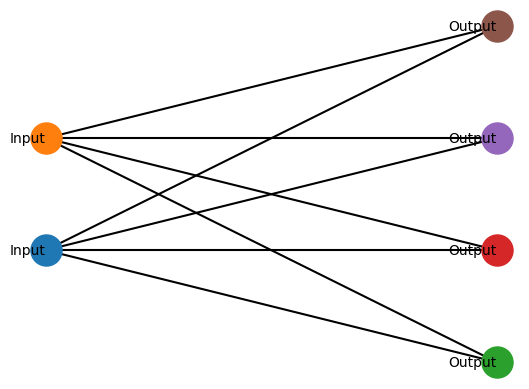

In [13]:
# Visually the matrix multiply multiplies across all of the connected lines.

# draw an input and output along with all of the connections
draw_dnn([2, 4])

The output from using the 3 steps is the same as calling the model directly.  `model(input_tensor)` is equivalent to `model.forward(input_tensor)`. 

# Neural networks consist of many Linear Transformations

Notice that in each layer the computation is basically the same taking the form

$ Y = X \cdot W + b $

**W** and **b** are the weight and bias matrices and **X** is the input matrix.  **Y** is the output of the **linear transformation**.

A linear transformation is a way to change a set of points (vectors) in space so that lines remain lines, and the origin remains fixed. In simpler terms, it's a rule for moving every point to a specific new location without twisting, warping, or tearing the shape formed by those points. In machine learning, this is often done using matrices to systematically shift, rotate, or scale the input data.

In the above code, the function used the `t()` function which transposes a matrix.  In the first instance, the input_tensor has a **shape** of (1,2) and the W_input has a shape of (4, 2).  Matrix multiplication requires that **broadcasting rules** be followed.  Taking the transposed form of W_input changes its shape to (2, 4).  The result (Y_input) of the matrix multiplication is a matrix of (1, 4).  

```
Y_input = torch.matmul(input_tensor, W_input.t()) + b_input
```


# Broadcasting Rules

If you understand broadcasting rules, it can help to make sense of when to transpose a matrix and what types of shape transformations can happen.  [Andrej Karpathy's Zero to Hero course](https://karpathy.ai/zero-to-hero.html) explains this well!

[Read this to understand broadcasting rules](https://numpy.org/doc/stable/user/basics.broadcasting.html).  

# Neural networks usually start out with random values that need trained

A model is **trained** by having its weights adjusted by small amounts so that the **accuracy** improves and the **loss** shrinks.  During training, it is common for the **loss** to grow instead of shrink in some cases.  This happens when the model potentially skips over the ideal weight combination or finds itself in a local minima.  


# Gradient Descent and Learning Rate

The process of applying gradient descent to a neural network deposits gradients to each parameter of the network.  The gradient is a floating point number indicating the direction the parameter in the network needs to change to improve **accuracy** and reduce **loss**.  Once the gradients are distributed through the network, they are applied by multiplying the **negative** gradient by the weight or bias and a **learning rate**.  The negative is why the process is called **descent**.  When numbers are multiplied and one of them is negative, it makes the entire result negative.  The gradient is like a slope and if the negative wasn't used, the result would continue to grow away from the desired result.

# Optimizer

The gradients are deposited to each weight and depending upon the network setup a multiple gradients may be deposited to the same weight.  When this happens, the gradients are simply summed together.  For this reason, before depositing gradients it is important to set them all to zero.  In PyTorch this is done by using an **optimizer**. 

# Learning Rate

The **learning rate** is typically a small number 0.01E-4 to 0.01E-5.  The primary reason for the learning rate being so small is to prevent the model from skipping past the best settings.  There is a lot that can be done with learning rates including making them dynamic, altering them based upon the given epoch.

# Epoch

An epoch is one complete pass through the entire training dataset. During an epoch, the model's parameters are updated iteratively using subsets of the training data, often referred to as batches. Multiple epochs are usually necessary to sufficiently train a model.  In the code below, 2000 epochs are used training on the single equation `30+70 = 100`.

# Hyperparameters

A hyperparameter is a parameter whose value is set before the training process begins, as opposed to the parameters of the model, which are learned during training. Examples include learning rate, batch size, and number of epochs. Hyperparameters are often tuned to optimize model performance.

# Loss function

The loss function (often called criterion) is used to compare the model's prediction to the actual value.  In the example below, the loss function is the MSELoss() function.  The MSELoss function calculates the average of the squares of the differences between predicted and actual values.

At the end of the code below, 99.9778 is predicted for 30+70.  The model seems to be performing well.

In [14]:
set_random_seed(42)
model = Adder()

# Hyperparameters
learning_rate = 0.0002
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

epochs = 2000

# Create one row with [30, 70]
input_data = torch.Tensor([[30, 70]])

# Compute the sum of each row in input_data
target = torch.sum(input_data, dim=1, keepdim=True)

for i in range(epochs):
    # Get a prediction from the model
    prediction = model(input_data)

    # Compute loss by comparing the prediction to target
    loss = criterion(prediction, target)

    # Print the first epoch, and one for every 10% thereafter.
    print(f"[{i+1}] Prediction: {prediction.item()}, Loss: {loss.item()}") if i == 0 or i % (epochs / 10) == (epochs / 10)-1 else None
        
    # Zero the gradients so that they can accumulate during loss.backward()
    optimizer.zero_grad()
    # Set all of the gradients in the network based upon the loss
    loss.backward()
    # Alter the weights in the network based upon the accumulated gradients and the learning rate using the optimizer
    optimizer.step()

model(torch.Tensor([[30, 70]])).item()

[1] Prediction: 1.1862752437591553, Loss: 9764.1533203125
[200] Prediction: 12.131690979003906, Loss: 7720.83984375
[400] Prediction: 26.5450382232666, Loss: 5395.6318359375
[600] Prediction: 44.40176010131836, Loss: 3091.164306640625
[800] Prediction: 63.6128044128418, Loss: 1324.0279541015625
[1000] Prediction: 80.54126739501953, Loss: 378.64227294921875
[1200] Prediction: 91.87659454345703, Loss: 65.98971557617188
[1400] Prediction: 97.37152862548828, Loss: 6.9088616371154785
[1600] Prediction: 99.3274917602539, Loss: 0.4522673189640045
[1800] Prediction: 99.86224365234375, Loss: 0.018976811319589615
[2000] Prediction: 99.97758483886719, Loss: 0.0005024394486099482


99.97779846191406

# Overfitting

Overfitting occurs when a model learns the training data too well, capturing noise and anomalies, rather than the underlying pattern. As a result, it performs poorly on new, unseen data. Overfitting is often a sign that a model is too complex relative to the simplicity of the problem. Techniques like **regularization**, **dropout**, and **simpler architectures** can help mitigate overfitting.

Notice how that the model has learned to answer 30+70 pretty well, but the other equations aren't right.

In [15]:
def test_model(model, a, b):
    return model(torch.Tensor([[a, b]])).item()

print(f"30 + 70 = {test_model(model, 30, 70):0.2f}")
print(f"70 + 30 = {test_model(model, 70, 30):0.2f}")
print(f"130 + -30 = {test_model(model, 130, -30):0.2f}")
print(f"3 + 7 = {test_model(model, 3, 7):0.2f}")
print(f"33 + 7 = {test_model(model, 33, 7):0.2f}")

30 + 70 = 99.98
70 + 30 = 78.66
130 + -30 = 46.67
3 + 7 = 11.01
33 + 7 = 29.47


# Providing lots of examples for training

In this case, the model learned from a single example.  It learned to produce 100 when 30 and 70 were presented to it, but as is evident from above, it didn't learn addition.  Notice that 30+70 != 70+30!

We can use torch to generate a bunch of examples to train on along with their targets.

In [16]:
# Generate 10,000 random pairs between -500 and 500
input_data = (torch.rand(10000, 2) * 1000) - 500

# Calculate the target sum for each pair
target = torch.sum(input_data, dim=1, keepdim=True)

print(input_data[0], target[0])

tensor([403.9817,  54.6599]) tensor([458.6415])


In [17]:
set_random_seed(42)
model = Adder()

# Hyperparameters
learning_rate = 0.0002
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

epochs = 2000

# Generate 10,000 random pairs between -500 and 500
input_data = (torch.rand(10000, 2) * 1000) - 500

# Calculate the target sum for each pair
target = torch.sum(input_data, dim=1, keepdim=True)

for i in range(epochs):
    # Get a prediction from the model
    prediction = model(input_data)

    # Compute loss by comparing the prediction to target
    loss = criterion(prediction, target)

    # Print the first epoch, and one for every 10% thereafter.
    print(f"[{i+1}] Loss: {loss.item()}") if i == 0 or i % (epochs / 10) == (epochs / 10)-1 else None
        
    # Zero the gradients so that they can accumulate during loss.backward()
    optimizer.zero_grad()
    # Set all of the gradients in the network based upon the loss
    loss.backward()
    # Alter the weights in the network based upon the accumulated gradients and the learning rate using the optimizer
    optimizer.step()

print(f"30 + 70 = {test_model(model, 30, 70):0.2f}")
print(f"70 + 30 = {test_model(model, 70, 30):0.2f}")
print(f"130 + -30 = {test_model(model, 130, -30):0.2f}")
print(f"3 + 7 = {test_model(model, 3, 7):0.2f}")
print(f"33 + 7 = {test_model(model, 33, 7):0.2f}")
print(f"-330000 + 30000 = {test_model(model, -330000, 30000):0.2f}")

[1] Loss: 157707.71875
[200] Loss: 129525.609375
[400] Loss: 94930.3203125
[600] Loss: 56312.48046875
[800] Loss: 24221.19921875
[1000] Loss: 6701.4951171875
[1200] Loss: 1136.9481201171875
[1400] Loss: 136.98550415039062
[1600] Loss: 15.29101848602295
[1800] Loss: 1.7806323766708374
[2000] Loss: 0.25018075108528137
30 + 70 = 99.69
70 + 30 = 99.62
130 + -30 = 99.51
3 + 7 = 9.68
33 + 7 = 39.65
-330000 + 30000 = -299593.59


# Adding functions to shared python file

Throughout this tuturial, functions will be added to shared.py so that they can be reused in later sections.

Functions that will be reused from this tutorial are draw_dnn and set_random_seed.

In the next section, the Adder model will be explored further.